In [2]:
# HÜCRE 1: Hazır Verileri Yükleme
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# 1. Drive Bağlantısı
drive.mount('/content/drive')

# 2. Kayıtlı Dosyaların Yolu
LOAD_PATH = '/content/drive/MyDrive/Colab Notebooks/SER_Projesi/'

# 3. Yükleme İşlemi
print("Veriler Drive'dan okunuyor...")
X = np.load(LOAD_PATH + 'X_features_10x.npy')
y = np.load(LOAD_PATH + 'y_labels_10x.npy')

print(f"Yükleme Başarılı!")
print(f"Özellikler (X) Boyutu: {X.shape}")
print(f"Etiketler (y) Boyutu: {y.shape}")

# X'in boyutunu CNN için ayarladım
X = np.expand_dims(X, axis=2)
print(f"CNN İçin Yeni Boyut: {X.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veriler Drive'dan okunuyor...
Yükleme Başarılı!
Özellikler (X) Boyutu: (15360, 40)
Etiketler (y) Boyutu: (15360,)
CNN İçin Yeni Boyut: (15360, 40, 1)


In [3]:
# HÜCRE 2: Encoding ve Train/Test Split
# 1. Label Encoding
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)
y_onehot = to_categorical(y_encoded)

print("Sınıflar:", lb.classes_)
print("One-Hot Örneği:", y_onehot[0])

# 2. Veriyi Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot)

print("\n VERİ SETİ AYRILDI:")
print(f"Eğitim Seti (Train): {X_train.shape}")
print(f"Test Seti (Test):   {X_test.shape}")

Sınıflar: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
One-Hot Örneği: [1. 0. 0. 0. 0. 0. 0. 0.]

 VERİ SETİ AYRILDI:
Eğitim Seti (Train): (12288, 40, 1)
Test Seti (Test):   (3072, 40, 1)


In [4]:
# HÜCRE 3: CNN Model Mimarisi

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

model = Sequential()

# 1. Katman
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3)) # %30 nöronu rastgele kapat

# 2. Katman
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# 3. Katman
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# 4. Katman
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# ÇIKTI KATMANI
model.add(Dense(8, activation='softmax'))

# Modeli Derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Özeti Göster
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 20, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372,360 (1.42 MB)

 Trainable params: 371,464 (1.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [5]:
# HÜCRE 4: Eğitim Aşaması
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Callbacks
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# 2. Eğitimi Başlat
# batch_size=32 -> Her seferinde 32 ses dosyasını aynı anda analiz ediyoruz.
# epochs=50 -> Tüm veriyi 50 kere dön.
print(" Eğitim Başladı.")

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop, reduce_lr])

print("Eğitim Tamamlandı! En iyi ağırlıklar yüklendi.")

 Eğitim Başladı.
Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.1998 - loss: 2.1645 - val_accuracy: 0.3027 - val_loss: 1.7682 - learning_rate: 0.0010
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3101 - loss: 1.7781 - val_accuracy: 0.3630 - val_loss: 1.6717 - learning_rate: 0.0010
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3342 - loss: 1.7032 - val_accuracy: 0.3848 - val_loss: 1.5726 - learning_rate: 0.0010
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3470 - loss: 1.6635 - val_accuracy: 0.3942 - val_loss: 1.5460 - learning_rate: 0.0010
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3774 - loss: 1.6226 - val_accuracy: 0.4215 - val_loss: 1.4991 - learning_rate: 0.0010
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4002 - loss: 1.5663 - val_accuracy: 0.4284 - val_loss: 1.4673 - learning_rate: 0.0010
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.40

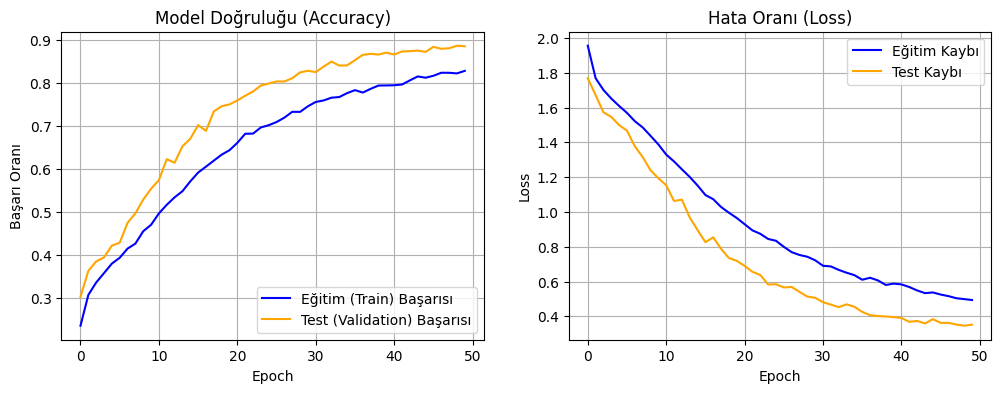

--------------------------------------
  FİNAL TEST SONUCU: %88.61
--------------------------------------


In [6]:
# HÜCRE 5: Performans Grafikleri

# Doğruluk (Accuracy) Grafiği
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim (Train) Başarısı', color='blue')
plt.plot(history.history['val_accuracy'], label='Test (Validation) Başarısı', color='orange')
plt.title('Model Doğruluğu (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Başarı Oranı')
plt.legend()
plt.grid(True)

# Kayıp (Loss) Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='blue')
plt.plot(history.history['val_loss'], label='Test Kaybı', color='orange')
plt.title('Hata Oranı (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# Final Skoru Yazdır
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"--------------------------------------")
print(f"  FİNAL TEST SONUCU: %{acc*100:.2f}")
print(f"--------------------------------------")

In [7]:
# HÜCRE 6: Modeli Kaydetme
MODEL_NAME = f"SER_Model_CNN_Acc_{acc*100:.0f}.keras"
SAVE_PATH_MODEL = '/content/drive/MyDrive/Colab Notebooks/SER_Projesi/' + MODEL_NAME

print(f" Model kaydediliyor: {MODEL_NAME} ...")

model.save(SAVE_PATH_MODEL)

print(f" KAYDEDİLDİ! Dosya yolu: {SAVE_PATH_MODEL}")

 Model kaydediliyor: SER_Model_CNN_Acc_89.keras ...
 KAYDEDİLDİ! Dosya yolu: /content/drive/MyDrive/Colab Notebooks/SER_Projesi/SER_Model_CNN_Acc_89.keras


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


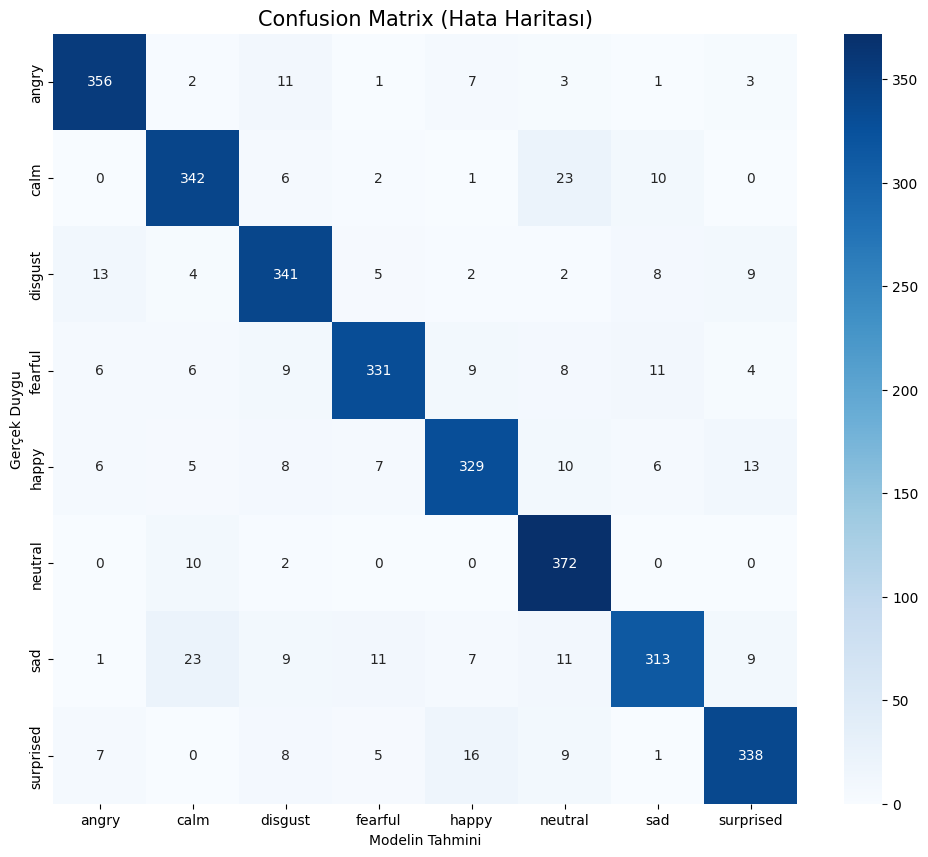

In [9]:
# HÜCRE 7: Detaylı Hata Analizi
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Modelden Tahminleri Al
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 2. Matrisi Oluştur
cm = confusion_matrix(y_true, y_pred_classes)

# 3. Görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_,
            yticklabels=lb.classes_)

plt.title('Confusion Matrix (Hata Haritası)', fontsize=15)
plt.ylabel('Gerçek Duygu')
plt.xlabel('Modelin Tahmini')
plt.show()

In [11]:
# HÜCRE 8: LSTM Modeli
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import os

print(" LSTM Modeli Eğitiliyor...")

# 1. Kayıt Yolunu Tanımla
SAVE_PATH = '/content/drive/MyDrive/Colab Notebooks/SER_Projesi/'

# 2. LSTM Mimarisi
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape=(40, 1)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(8, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Eğit
history_lstm = model_lstm.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=50,
                              batch_size=32,
                              callbacks=[early_stop, reduce_lr],
                              verbose=1)

# 4. Skoru Al ve Kaydet
loss_lstm, acc_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f" LSTM TEST SONUCU: %{acc_lstm*100:.2f}")

LSTM_NAME = f"SER_Model_LSTM_Acc_{acc_lstm*100:.0f}.keras"
model_lstm.save(SAVE_PATH + LSTM_NAME)
print(f" LSTM Kaydedildi: {LSTM_NAME}")

 LSTM Modeli Eğitiliyor...
Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2265 - loss: 1.9678 - val_accuracy: 0.2923 - val_loss: 1.7909 - learning_rate: 0.0010
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3045 - loss: 1.8033 - val_accuracy: 0.3096 - val_loss: 1.7234 - learning_rate: 0.0010
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3340 - loss: 1.7083 - val_accuracy: 0.3734 - val_loss: 1.6048 - learning_rate: 0.0010
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3680 - loss: 1.6158 - val_accuracy: 0.3952 - val_loss: 1.5621 - learning_rate: 0.0010
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3987 - loss: 1.5576 - val_accuracy: 0.4010 - val_loss: 1.5253 - learning_rate: 0.0010
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4328 - loss: 1.4946 - val_accuracy: 0.4447 - val_loss: 1.4391 - learning_rate: 0.0010
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - 

In [12]:
# HÜCRE 9: MLP Modeli
from keras.layers import Flatten, BatchNormalization

print(" MLP Modeli Eğitiliyor...")

# 1. MLP Mimarisi
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(40, 1)))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(128, activation='relu'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(8, activation='softmax'))

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2. Eğit
history_mlp = model_mlp.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=50,
                            batch_size=32,
                            callbacks=[early_stop, reduce_lr],
                            verbose=1)

# 3. Skoru Al ve Kaydet
loss_mlp, acc_mlp = model_mlp.evaluate(X_test, y_test, verbose=0)
print(f" MLP TEST SONUCU: %{acc_mlp*100:.2f}")

MLP_NAME = f"SER_Model_MLP_Acc_{acc_mlp*100:.0f}.keras"
model_mlp.save(SAVE_PATH + MLP_NAME)
print(f" MLP Kaydedildi: {MLP_NAME}")

 MLP Modeli Eğitiliyor...
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2485 - loss: 2.0083 - val_accuracy: 0.3584 - val_loss: 1.6650 - learning_rate: 0.0010
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3570 - loss: 1.6595 - val_accuracy: 0.3773 - val_loss: 1.5887 - learning_rate: 0.0010
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4257 - loss: 1.5300 - val_accuracy: 0.4095 - val_loss: 1.5328 - learning_rate: 0.0010
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4407 - loss: 1.4735 - val_accuracy: 0.3815 - val_loss: 1.6362 - learning_rate: 0.0010
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4640 - loss: 1.4180 - val_accuracy: 0.3750 - val_loss: 1.6869 - learning_rate: 0.0010
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4773 - loss: 1.3889 - val_accuracy: 0.5085 - val_loss: 1.3005 - learning_rate: 0.0010
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4920 - loss: 1.3464 - val_accurac

 LSTM Modeli analiz ediliyor...
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


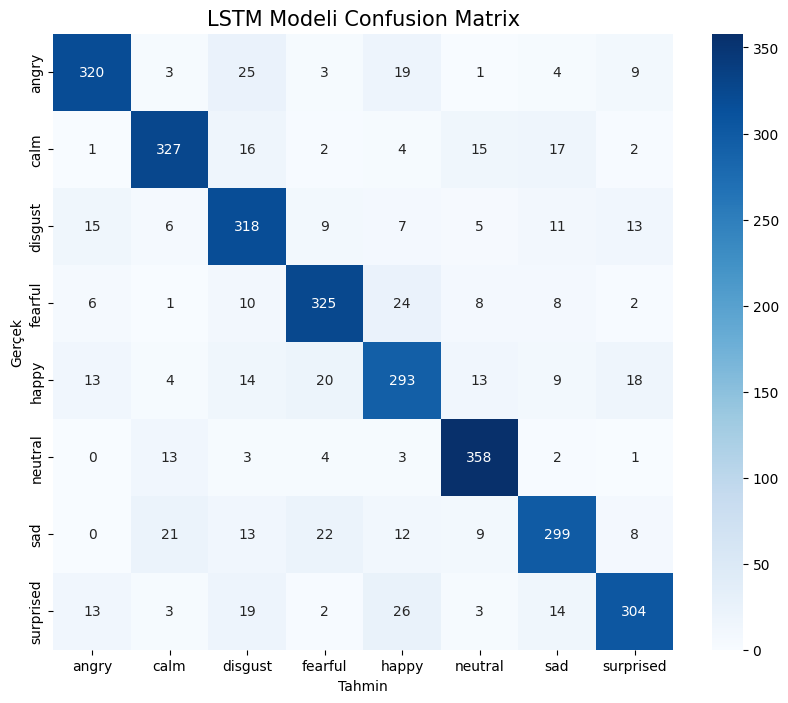

 MLP Modeli analiz ediliyor...
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


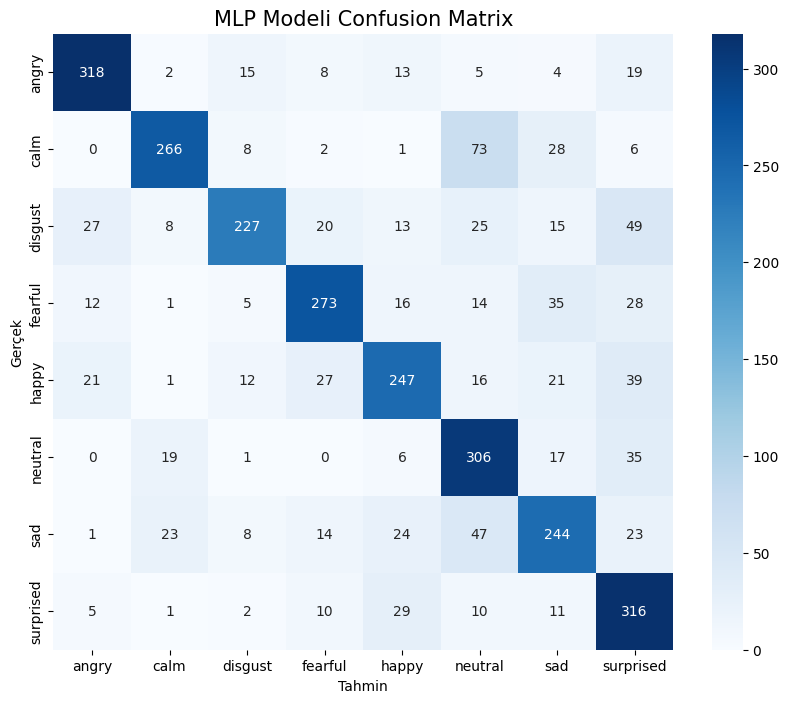

In [13]:
# HÜCRE 10: LSTM ve MLP İçin Hata Haritaları
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, model_name):
    print(f" {model_name} analiz ediliyor...")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=lb.classes_,
                yticklabels=lb.classes_)
    plt.title(f'{model_name} Confusion Matrix', fontsize=15)
    plt.ylabel('Gerçek')
    plt.xlabel('Tahmin')
    plt.show()

# Çizdir
plot_confusion_matrix(model_lstm, "LSTM Modeli")
plot_confusion_matrix(model_mlp, "MLP Modeli")

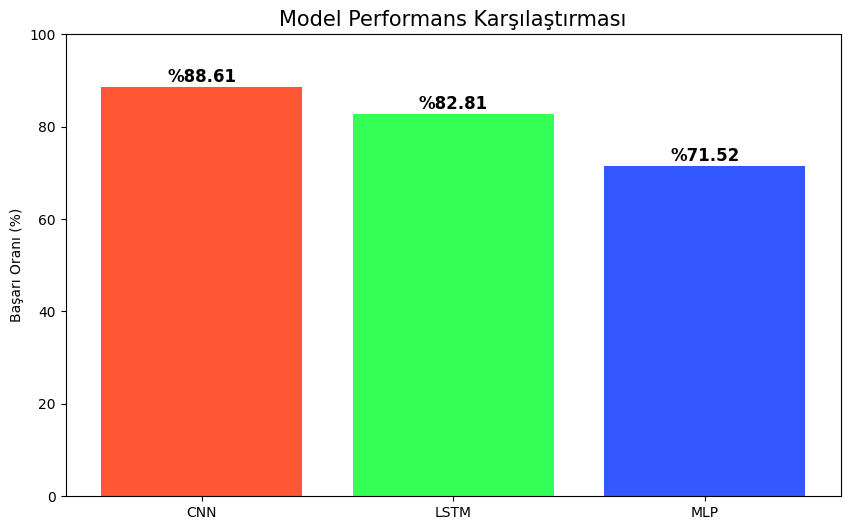

In [15]:
# HÜCRE 11: Model Karşılaştırma Tablosu

models_list = ['CNN', 'LSTM', 'MLP']
accuracies = [acc * 100, acc_lstm * 100, acc_mlp * 100]

plt.figure(figsize=(10, 6))
bars = plt.bar(models_list, accuracies, color=['#FF5733', '#33FF57', '#3357FF'])

plt.title('Model Performans Karşılaştırması', fontsize=15)
plt.ylabel('Başarı Oranı (%)')
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'%{yval:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.show()
